In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Dry_Bean_Dataset.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(13611, 16)
(10888, 16)
(2723, 16)


In [5]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Accuracy Score        :  0.6401028277634961
Classification Report : 
               precision    recall  f1-score   support

    BARBUNYA       0.35      0.08      0.13       255
      BOMBAY       1.00      1.00      1.00        92
        CALI       0.62      0.84      0.72       350
    DERMASON       0.78      0.87      0.82       735
       HOROZ       0.60      0.57      0.59       390
       SEKER       0.37      0.23      0.29       376
        SIRA       0.58      0.74      0.65       525

    accuracy                           0.64      2723
   macro avg       0.61      0.62      0.60      2723
weighted avg       0.61      0.64      0.61      2723



<Axes: >

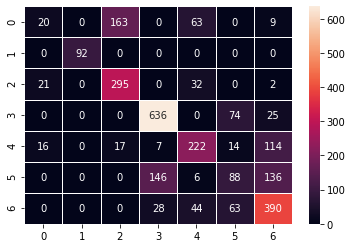

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
cfm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [7]:
# K folds cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state=2, shuffle = True)

In [8]:
from sklearn. model_selection import cross_val_score
from numpy import mean, std
modelSVM = SVC()
scores = cross_val_score(modelSVM,X_test, y_test, scoring="accuracy", cv=kf, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.641 (0.014)


In [9]:
# fine tune parameters for lr model
from sklearn.model_selection import GridSearchCV

grid_params_svm = {
    'C':[0.1,1,10,100],
    'gamma':["scale", "auto"],
    'kernel':['linear', 'rbf']
}

svm = SVC()
gs_svm_result = GridSearchCV(svm, grid_params_svm,cv=kf).fit(X_test, y_test)
print(gs_svm_result.best_score_)

In [ ]:
test = gs_svm_result.best_estimator_.score(X_test, y_test)
gs_svm_result.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
from sklearn.svm import SVC
clf=SVC(C=10, gamma='scale', kernel='linear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Accuracy Score        :  0.908223201174743
Classification Report : 
               precision    recall  f1-score   support

    BARBUNYA       0.95      0.84      0.89       125
      BOMBAY       1.00      1.00      1.00        49
        CALI       0.91      0.92      0.92       182
    DERMASON       0.90      0.94      0.92       365
       HOROZ       0.94      0.96      0.95       189
       SEKER       0.93      0.94      0.93       198
        SIRA       0.84      0.81      0.83       254

    accuracy                           0.91      1362
   macro avg       0.92      0.92      0.92      1362
weighted avg       0.91      0.91      0.91      1362



<Axes: >

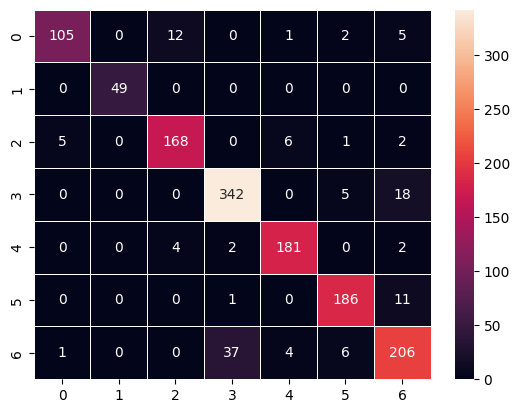

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
cfm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)